# Sentiment Analysis and NLP Use Cases on Stock Data

## This project demonstrates various Natural Language Processing (NLP) use cases, including sentiment analysis, the impact of sentiment on stock market prices, time series prediction of stock values, and Named Entity Recognition (NER) on news data.

In [31]:
!pip install finnhub-python yfinance textblob keras tensorflow spacy pandas scikit-learn matplotlib

In [32]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.7 MB/s eta 0:00:08
      --------------------------------------- 0.2/12.8 MB 2.8 MB/s eta 0:00:05
     - -------------------------------------- 0.5/12.8 MB 4.3 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.8 MB 6.7 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.8 MB 8.7 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/12.8 MB 9.6 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 10.8 MB/s eta 0:00:01
     ------------ --------------------------- 4.1/12.8 MB 11.5 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 12.4 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/12.8 MB 13.2 MB/s eta 0:00:01
     --------------------- ------------------ 7.0/12.8 MB 14.0 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8

In [33]:
import finnhub
import pandas as pd
from textblob import TextBlob
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import spacy

In [34]:
# Setup client
finnhub_client = finnhub.Client(api_key='cqaep19r01qkfes36gt0cqaep19r01qkfes36gtg')

In [35]:
# Fetch company news for Apple Inc. for January 2024
res = finnhub_client.company_news('AAPL', _from="2024-01-01", to="2024-01-31")

In [36]:
# Convert response to DataFrame
z = pd.DataFrame(res)

In [37]:
# Perform sentiment analysis on headlines and summaries
z['headline_sentiment'] = z['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
z['summary_sentiment'] = z['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [38]:
# Fetch historical stock prices for Apple Inc. for January 2024
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-01-31')

[*********************100%%**********************]  1 of 1 completed


In [39]:
# Merge stock data with sentiment data
z['date'] = pd.to_datetime(z['datetime'], unit='s').dt.date
stock_data['date'] = stock_data.index.date
merged_data = pd.merge(stock_data, z[['date', 'headline_sentiment', 'summary_sentiment']], on='date', how='inner')


In [40]:
# Calculate daily average sentiment
merged_data['average_sentiment'] = (merged_data['headline_sentiment'] + merged_data['summary_sentiment']) / 2


In [41]:
# Linear regression to predict stock price based on sentiment
X = merged_data[['average_sentiment']].values
y = merged_data['Close'].values


In [42]:
model = LinearRegression()


In [43]:
model.fit(X, y)

LinearRegression()

In [44]:
# Predict stock prices based on sentiment
predicted_prices = model.predict(X)

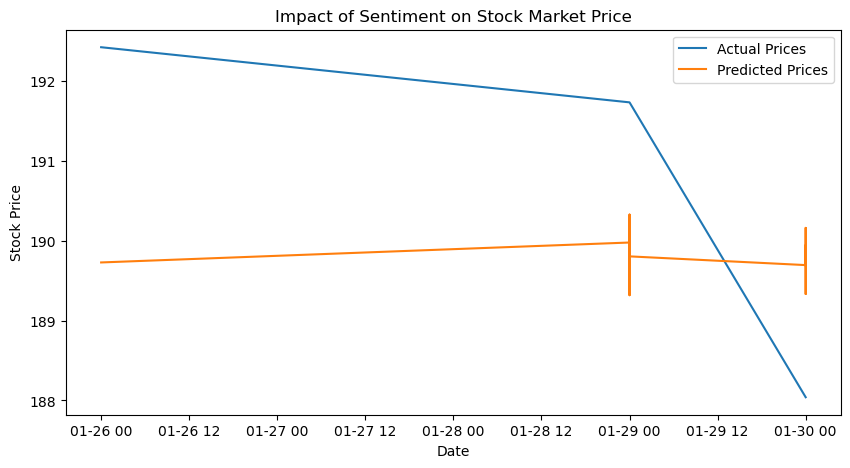

In [45]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(merged_data['date'], merged_data['Close'], label='Actual Prices')
plt.plot(merged_data['date'], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Impact of Sentiment on Stock Market Price')
plt.legend()
plt.show()

In [46]:
# Preprocess data for time series prediction
data = merged_data[['Close', 'average_sentiment']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [47]:
# Prepare training data
X_train, y_train = [], []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [48]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model.add(LSTM(units=50))
model.add(Dense(1))

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0585
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0266
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0306
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0302
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0331
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0285
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0238
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0247
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0253
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0229
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0212
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0236
Epoch 13/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0227
Epoch 14/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0235
Epoch 15/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0208
Epoch 16/25
3/3 ━━━━━━━━━━━━━━━━━━

In [51]:
# Prepare test data
test_data = scaled_data[-80:]
X_test = []
y_test = data[-20:, 0]
for i in range(60, 80):
    X_test.append(test_data[i-60:i])
X_test = np.array(X_test)

In [52]:
# Predict stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(np.concatenate((predicted_stock_price, test_data[60:, 1:2]), axis=1))[:, 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


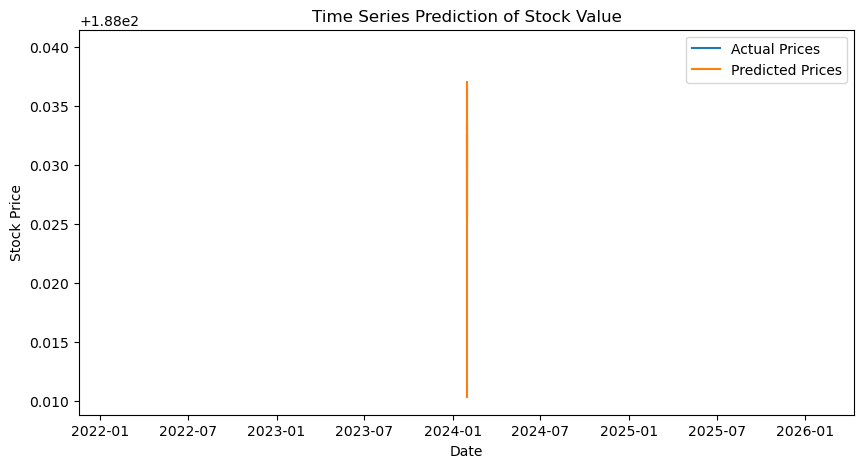

In [53]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(merged_data['date'][-20:], y_test, label='Actual Prices')
plt.plot(merged_data['date'][-20:], predicted_stock_price, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Time Series Prediction of Stock Value')
plt.legend()
plt.show()

In [54]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

In [55]:
# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [56]:
# Extract entities from headlines and summaries
z['headline_entities'] = z['headline'].apply(extract_entities)
z['summary_entities'] = z['summary'].apply(extract_entities)

In [57]:
# Print DataFrame with extracted entities
print(z[['headline', 'headline_entities', 'summary', 'summary_entities']])

                                              headline  \
0    Tech earnings, jobless claims, mortgage rates:...   
1    Apple to report Q1 earnings as investors focus...   
2             12 Highest Quality Camera Phones in 2024   
3    Big Tech earnings are here. Fasten your seat b...   
4    Apple, Google Could Win the War for the Digita...   
..                                                 ...   
221  Lyrical Asset Management 2023 U.S. Value Revie...   
222    My Top Bull Market Growth Stocks to Buy in 2024   
223    Giverny Capital Asset Management Q4 2023 Letter   
224                Horizon Kinetics Q4 2023 Commentary   
225  Oppenheimer Weighs in on Apple Stock Ahead of ...   

                                     headline_entities  \
0                                                   []   
1                         [(Apple, ORG), (China, GPE)]   
2    [(12, CARDINAL), (Highest Quality Camera Phone...   
3                                                   []   
4            

In [ ]:
By- DIVYANSH SHIVHARE